In [1]:
from ClassSARenvironment import SARenvHRL
from ClassHierarchicalQlearningAgent import HierarchicalQLearningAgent
from ClassHierarchicalQlearningAttentionAgent import HierarchicalQLearningAgent_ATTENTION
from utils_functions import animate_policy, evaluate_policy, plot_learning_curve, plot_steps, visitation_heatmap

document json will be infused
Initialization complete.


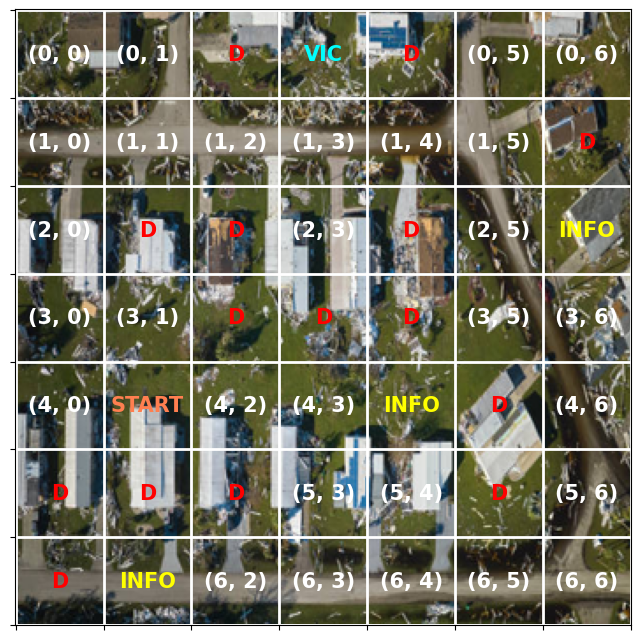

In [4]:
# Example initialization and training
gridsize = [7, 7]
startState = [(4, 1)]
victimStates = [(0, 3)]
ditches = [(1, 6), (2, 1), (2, 2), (2, 4), (3, 2), (3, 3), (3, 4), (4, 5), \
         (5, 0), (5, 1), (5, 2), (6, 0), (0, 2), (0, 4), (5, 5)]
fires = []
POIs = []
infoLocation = [(6, 1), (4, 4), (2, 6)]
fires = []
POIs = []
image_path = "/home/dimiubuntu/smc_24/HRL-LLM/images/disaster_area.jpg"
document_path = "/home/dimiubuntu/smc_24/HRL-LLM/data/sar_data.json"


env = SARenvHRL(gridsize, startState, victimStates, ditches, fires, POIs, infoLocation, image_path, document_path, mode='debug')

In [5]:
#### HIERARCHICAL Q-LEARNING initialisation and training #####
ALPHA = 0.1
GAMMA = 0.998
EPISODES = 1500
agent_simple = HierarchicalQLearningAgent(env, env.actionspace, ALPHA, GAMMA)
rewards_Q, total_Q, visits_Q = agent_simple.train_agent(EPISODES)

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of requested results 4 is greater than number of elements in index 2, updating n_results = 2


Episode: 0, Total Reward: 0, Exploration Rate: 1.0
real LLM is about to start handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station.
Hazardous Coordinates: [(5, 6)]
Point of Interest Coordinates: [(0, 3)]
real LLM is about to end handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station.
Episode: 200, Total Reward: -231, Exploration Rate: 0.7333333333333405
Episode: 400, Total Reward: -317, Exploration Rate: 0.4666666666666796
Episode: 600, Total Reward: -203, Exploration Rate: 0.20000000000001006
Episode: 800, Total Reward: 79, Exploration Rate: 0.01
Episode: 1000, Total Reward: 79, Exploration Rate: 0.01
Episode: 1200, Total Reward: 79, Exploration Rate: 0.01
Episode: 1400, Total Reward: 79, Exploration Rate: 0.01


In [3]:
#### HIERARCHICAL Q-LEARNING initialisation and training (with ATTENTION) #####
ALPHA = 0.1
GAMMA = 0.998
EPISODES = 1500
agent_attention = HierarchicalQLearningAgent_ATTENTION(env, env.actionspace, ALPHA, GAMMA)
rewards_ATT, total_ATT, visits_ATT, att_optios_ATT, att_prim_ATT = agent_attention.train_agent(EPISODES)

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of requested results 4 is greater than number of elements in index 1, updating n_results = 1


Episode: 0, Total Reward: 0, Exploration Rate: 1.0
real LLM is about to start handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station.
Hazardous Coordinates: [(5, 6)]
Point of Interest Coordinates: [(0, 3)]
real LLM is about to end handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station.
got the info needed at ep 46
[((6, 6), 'up'), ((4, 6), 'down')]
[((1, 3), 'up')]
Episode: 200, Total Reward: -286, Exploration Rate: 0.7333333333333405
Episode: 400, Total Reward: 77, Exploration Rate: 0.01
Episode: 600, Total Reward: 79, Exploration Rate: 0.01
Episode: 800, Total Reward: 79, Exploration Rate: 0.01
Episode: 1000, Total Reward: 79, Exploration Rate: 0.01
Episode: 1200, Total Reward: 79, Exploration Rate: 0.01
Episode: 1400, Total Reward: 79, Exploration Rate: 0.01
POIs identified during training [(0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3

Line appears at episode: 1087 for agent Hier-Q
Line appears at episode: 704 for agent Hier-Q+


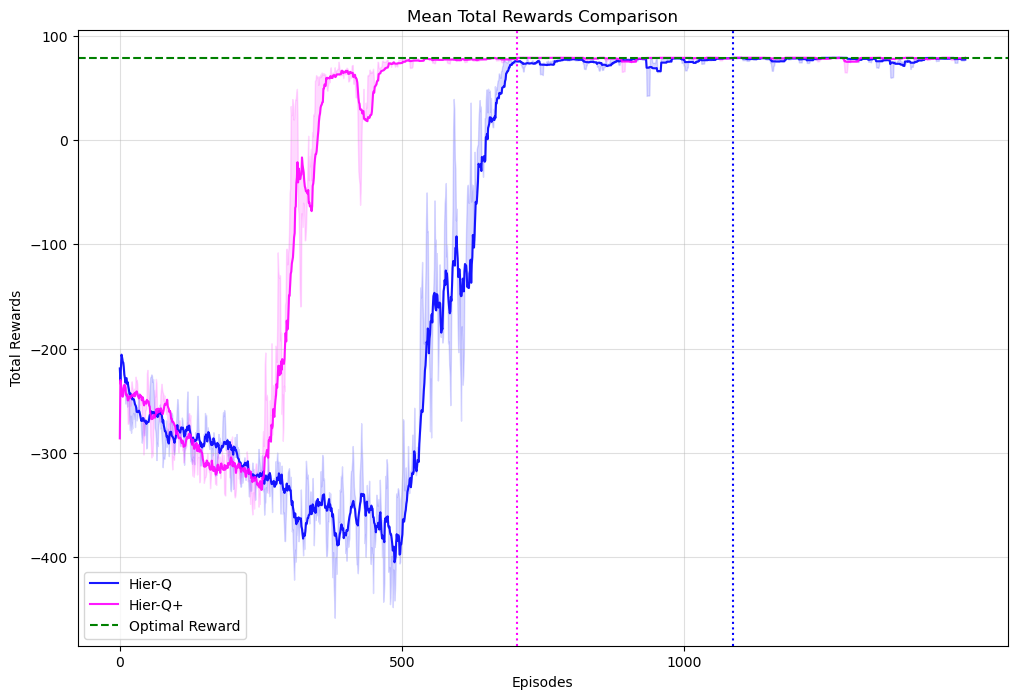

In [6]:
#### plotting rewards #####
labels = ["Hier-Q", "Hier-Q+"]
colors = ["blue", "magenta"]
total_rewards_list = [total_Q, total_ATT]#, avg_total_rewards_AGENT_1_ATTENTION]
plot_learning_curve(total_rewards_list, EPISODES, labels, colors, optimal_reward=79)

In [7]:
#### learned policy by HIERARCHICAL Q-LEARNING ####
evaluate_policy(env, agent_simple, verbose=True)

Step 0: || State=((4, 1), False, False, False, False) || Option: EXPLORE || Action: right || Reward=-1 || Next State=((4, 2), False, False, False, False) || Done=False
Step 1: || State=((4, 2), False, False, False, False) || Option: EXPLORE || Action: right || Reward=-1 || Next State=((4, 3), False, False, False, False) || Done=False
Step 2: || State=((4, 3), False, False, False, False) || Option: EXPLORE || Action: down || Reward=-1 || Next State=((5, 3), False, False, False, False) || Done=False
Step 3: || State=((5, 3), False, False, False, False) || Option: EXPLORE || Action: down || Reward=-1 || Next State=((6, 3), False, False, False, False) || Done=False
Step 4: || State=((6, 3), False, False, False, False) || Option: EXPLORE || Action: left || Reward=-1 || Next State=((6, 2), False, False, False, False) || Done=False
Step 5: || State=((6, 2), False, False, False, False) || Option: EXPLORE || Action: left || Reward=-1 || Next State=((6, 1), False, False, False, False) || Done=Fa

In [8]:
#### learned policy by HIERARCHICAL Q-LEARNING (with ATTENTION) ####
evaluate_policy(env, agent_attention, verbose=True)

Step 0: || State=((4, 1), False, False, False, False) || Option: EXPLORE || Action: right || Reward=-1 || Next State=((4, 2), False, False, False, False) || Done=False
Step 1: || State=((4, 2), False, False, False, False) || Option: EXPLORE || Action: right || Reward=-1 || Next State=((4, 3), False, False, False, False) || Done=False
Step 2: || State=((4, 3), False, False, False, False) || Option: EXPLORE || Action: down || Reward=-1 || Next State=((5, 3), False, False, False, False) || Done=False
Step 3: || State=((5, 3), False, False, False, False) || Option: EXPLORE || Action: down || Reward=-1 || Next State=((6, 3), False, False, False, False) || Done=False
Step 4: || State=((6, 3), False, False, False, False) || Option: EXPLORE || Action: left || Reward=-1 || Next State=((6, 2), False, False, False, False) || Done=False
Step 5: || State=((6, 2), False, False, False, False) || Option: EXPLORE || Action: left || Reward=-1 || Next State=((6, 1), False, False, False, False) || Done=Fa

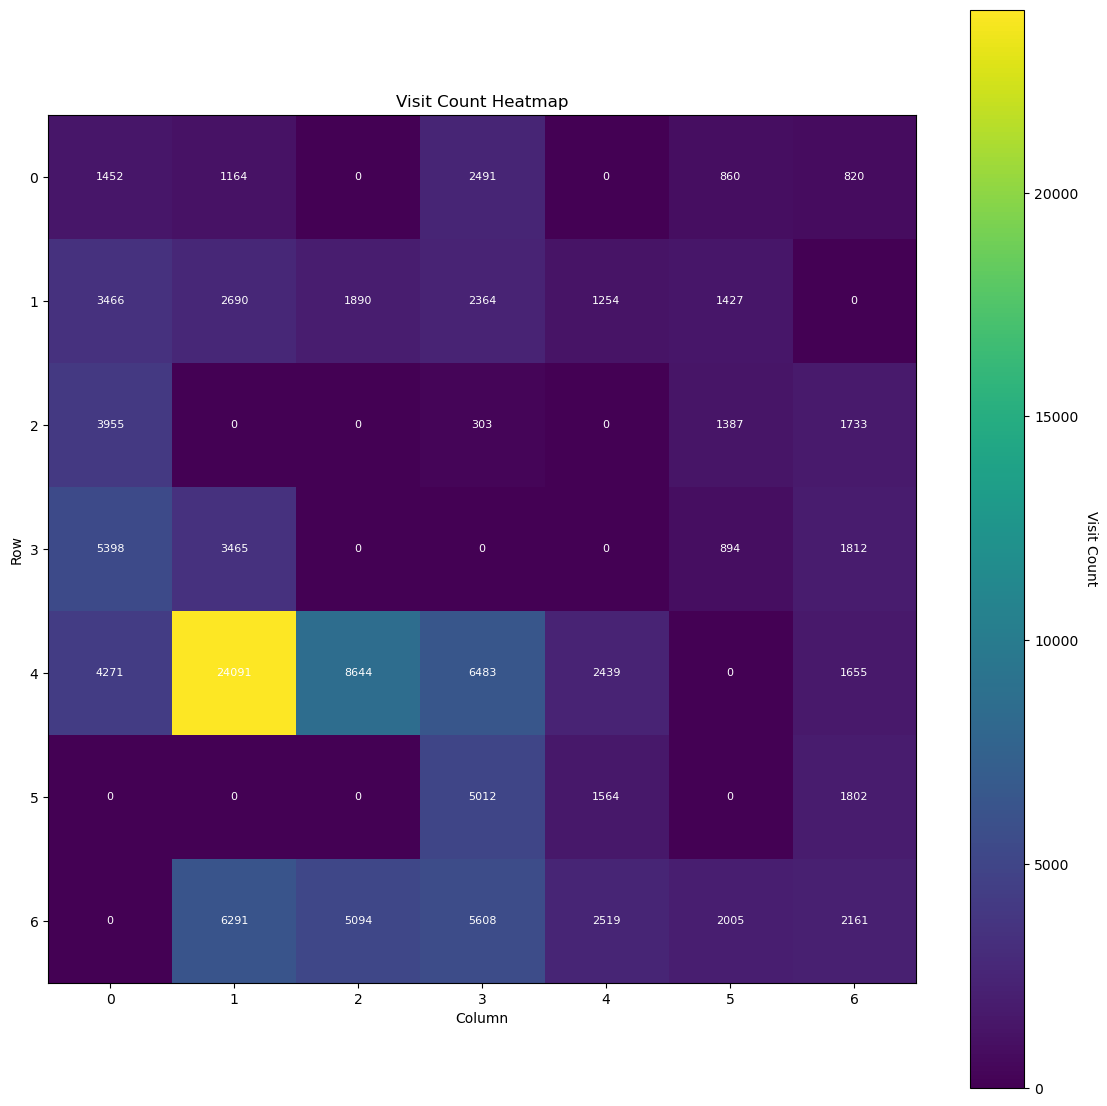

In [9]:
#### state visitation heatmap for HIERARCHICAL Q-LEARNING ####
visitation_heatmap(visits_Q, env.gridsize)

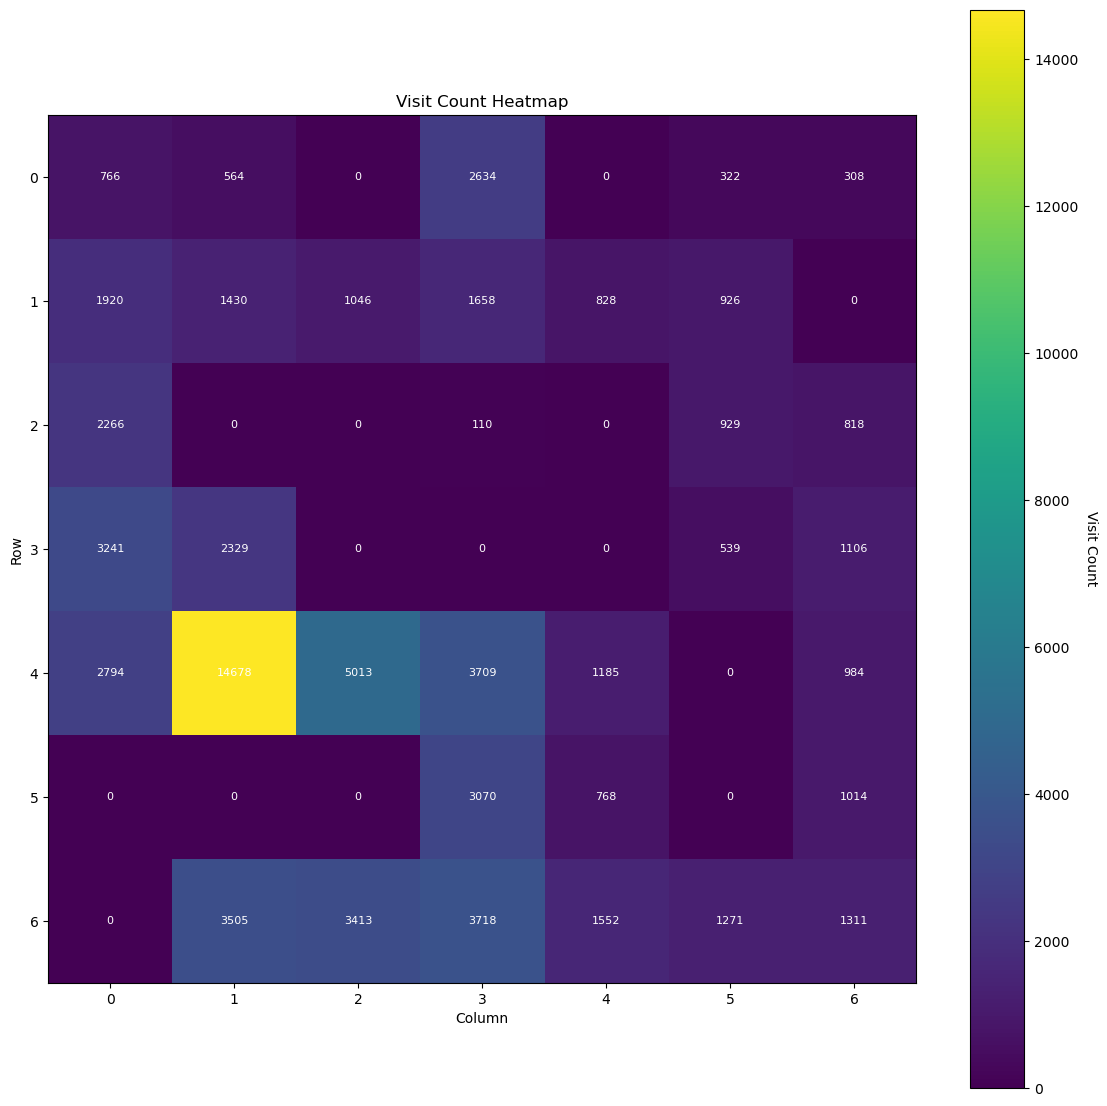

In [10]:
#### state visitation heatmap for HIERARCHICAL Q-LEARNING (with ATTENTION) ####
visitation_heatmap(visits_ATT, env.gridsize)